In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

%matplotlib inline
# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [ ]:
# Loading the data
raw_data = pd.read_csv("../data/churn.csv")

# print the shape
print(raw_data.shape)
#runs the first 5 rows
raw_data.head(5)

## Data Preprocessing

### Exploratory Data Analysis

In [4]:
# Checking for null values
raw_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
#Checking data types of each feature and the label
summary = raw_data.info()
print("Summary Statistics: \n", {'SUMMARY':summary})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
raw_data['TotalCharges'] = pd.to_numeric(raw_data['TotalCharges'], errors='coerce')

In [7]:
#Check data types again
summary = raw_data.info()
print("Summary Statistics: \n")
print(summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
raw_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# Investigate all the elements whithin each Feature 
for column in raw_data:
    unique_values = np.unique(raw_data[column])
    num_values = len(unique_values)
    if num_values <= 10:
        print(f"The number of values for feature {column} is {num_values}....{unique_values}")
    else:
        print(f"The number of values for feature {column} is {num_values}")

The number of values for feature customerID is 7043
The number of values for feature gender is 2....['Female' 'Male']
The number of values for feature SeniorCitizen is 2....[0 1]
The number of values for feature Partner is 2....['No' 'Yes']
The number of values for feature Dependents is 2....['No' 'Yes']
The number of values for feature tenure is 73
The number of values for feature PhoneService is 2....['No' 'Yes']
The number of values for feature MultipleLines is 3....['No' 'No phone service' 'Yes']
The number of values for feature InternetService is 3....['DSL' 'Fiber optic' 'No']
The number of values for feature OnlineSecurity is 3....['No' 'No internet service' 'Yes']
The number of values for feature OnlineBackup is 3....['No' 'No internet service' 'Yes']
The number of values for feature DeviceProtection is 3....['No' 'No internet service' 'Yes']
The number of values for feature TechSupport is 3....['No' 'No internet service' 'Yes']
The number of values for feature StreamingTV is 3

In [10]:
#Cross checking numeric columns for missing values
raw_data['MonthlyCharges'].shape
raw_data['TotalCharges'].shape
plt.style.use('fivethirtyeight')

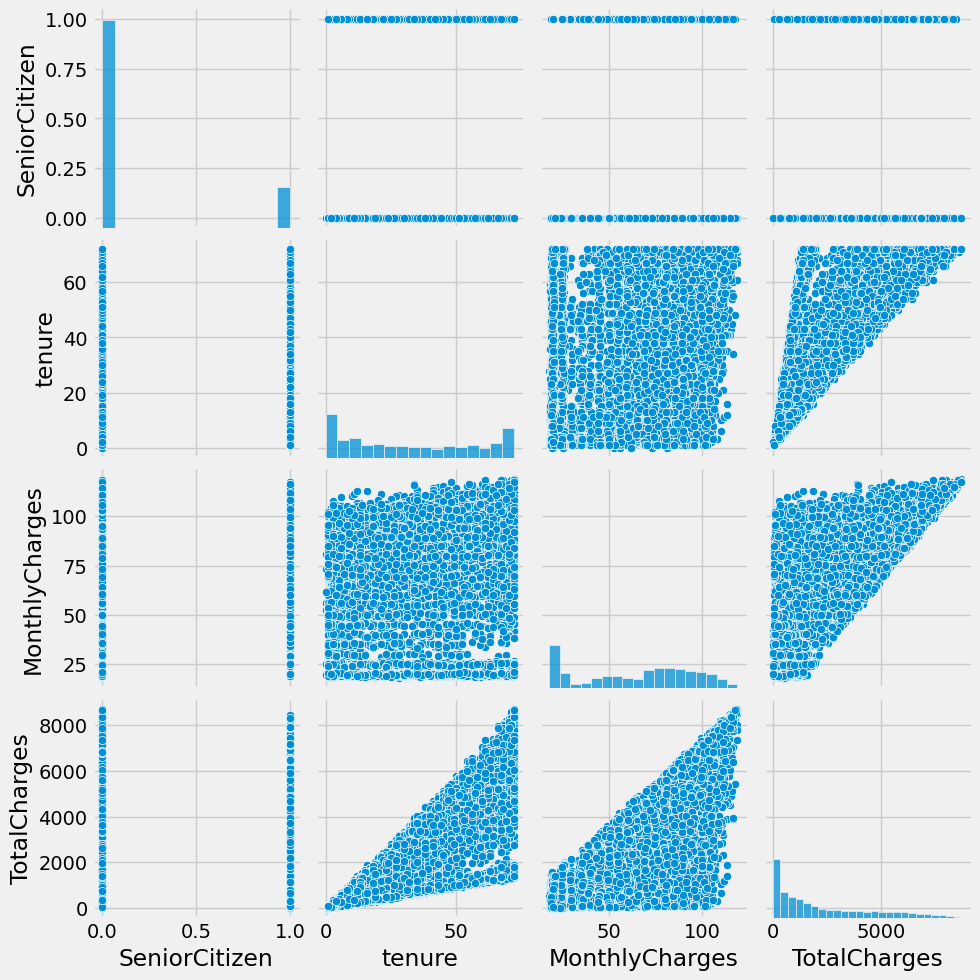

In [14]:
numeric_cols = raw_data.select_dtypes(include='number').columns.tolist()

g = sns.pairplot(raw_data)

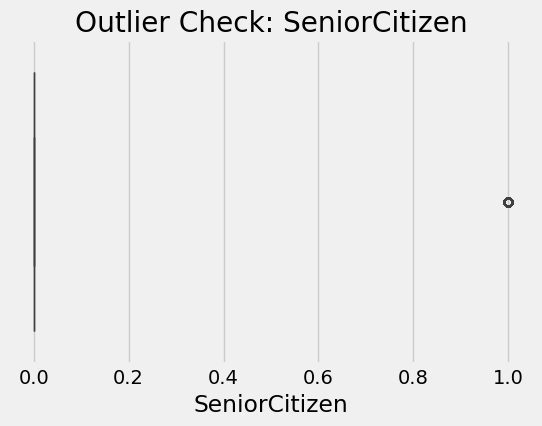

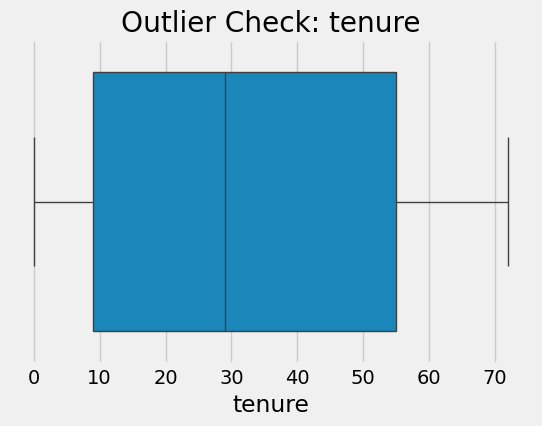

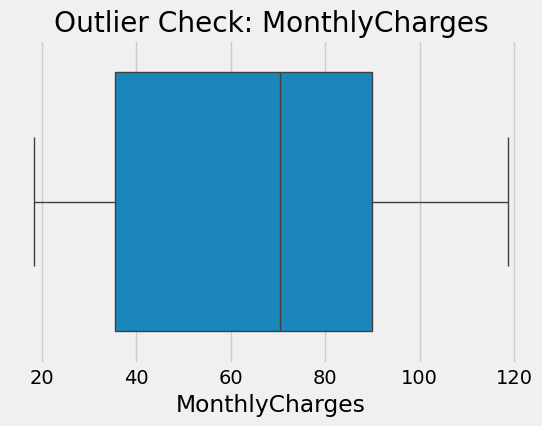

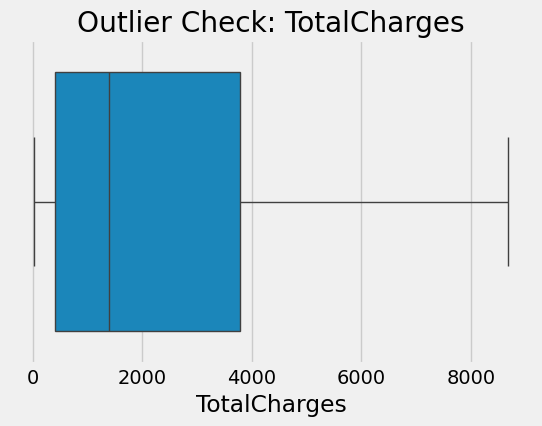

In [11]:
#checking for outliers in numeric features
# Visualize the data using seaborn boxplots
numeric_cols = raw_data.select_dtypes(include='number').columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=raw_data[col])
    plt.title(f'Outlier Check: {col}')
    plt.xlabel(col)
    plt.savefig(f'{col}.png')
    plt.show()

### Data Cleaning

In [25]:
## There are no outliers in our numeric columns tho Total charges are skewed to the right. Monthly charges is slightly skewed to the left

In [18]:
# Drop null rows in TotalCharges
raw_data = raw_data.dropna(subset=['TotalCharges'])

In [19]:
raw_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
print(raw_data.shape)

(7032, 21)


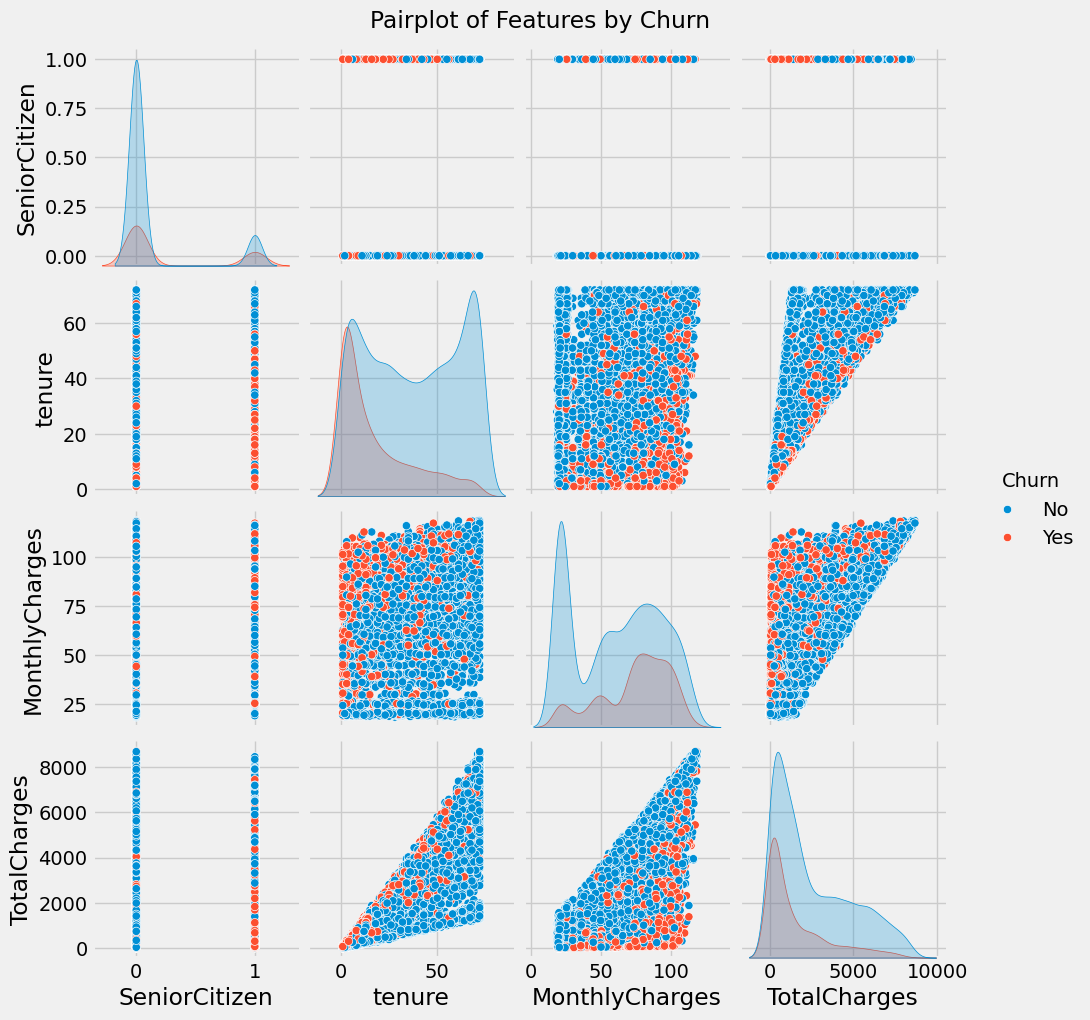

In [23]:
# Visualize the data using seaborn Pairplots
g = sns.pairplot(raw_data, hue="Churn")
g.fig.suptitle("Pairplot of Features by Churn", y=1.02)
g.fig.savefig("churn_pairplot.png", dpi=300, bbox_inches='tight')

- The pairplot shows that customers with low tenure are more likely to churn, indicating newer customers are at higher risk. Churn is also more common among those with high monthly charges, especially when total charges are still low. A strong positive correlation exists between tenure and total charges, and churners are mostly clustered in the low range of both. Senior citizens have a slightly higher churn rate, but this effect is less pronounced compared to tenure and charges. Overall, the most churn-prone group appears to be new customers with high monthly fees.

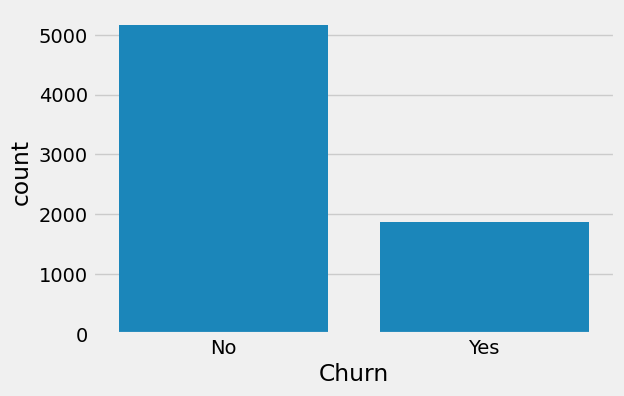

In [24]:
# Investigating the distr of y
plt.figure(figsize=(6,4))
i = sns.countplot(x= 'Churn', data = raw_data)

In [30]:
#We can observe that the No's way outnumbers yes', hence we will use class_weight='balanced' in our logistic regression
#we downsize to remove some majority class rows

In [25]:
raw_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

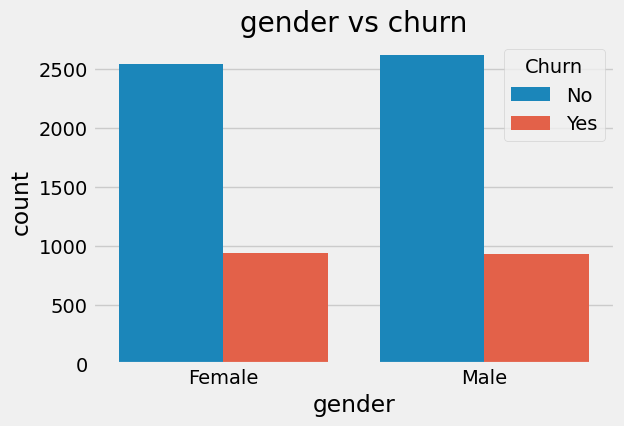

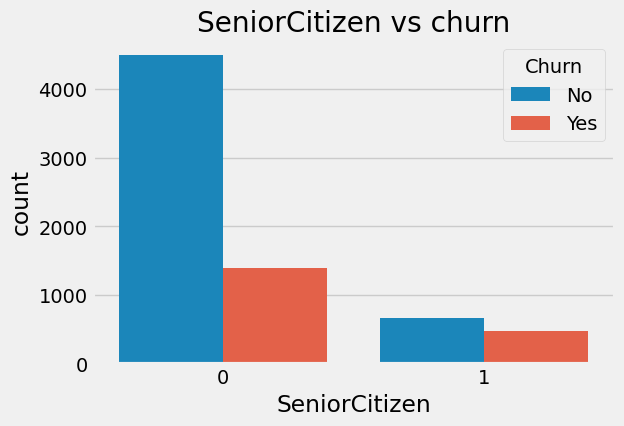

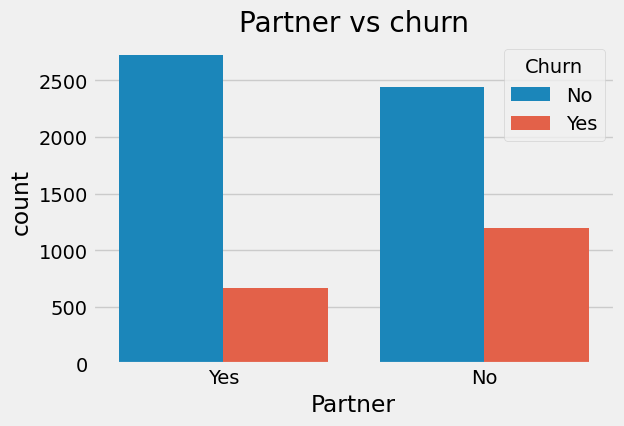

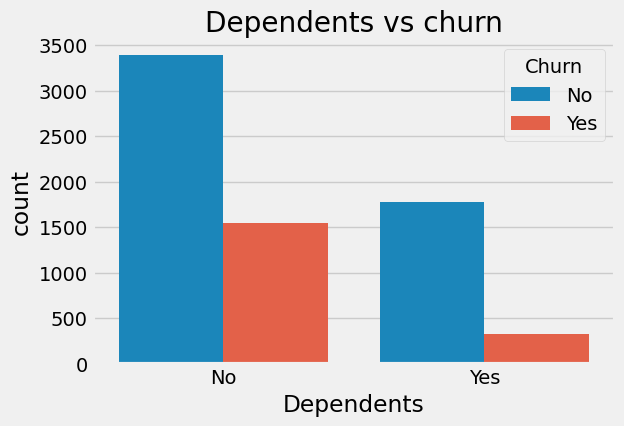

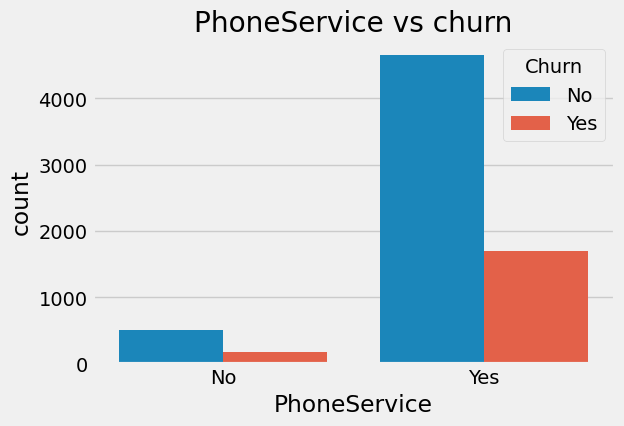

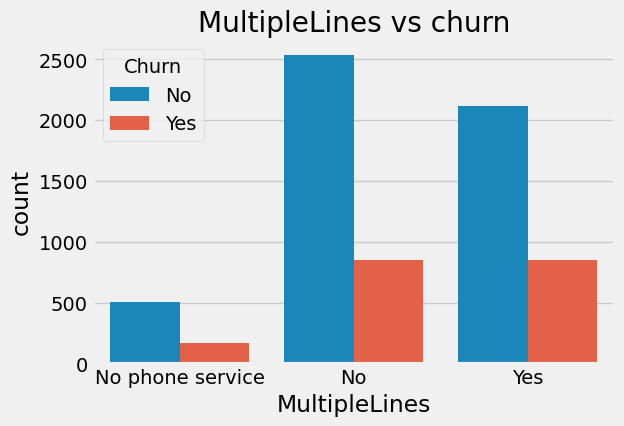

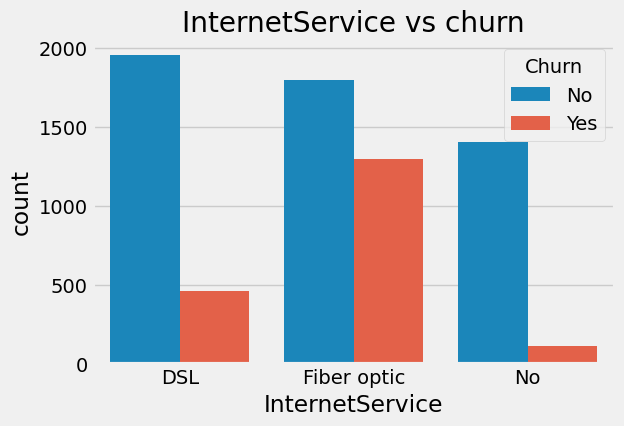

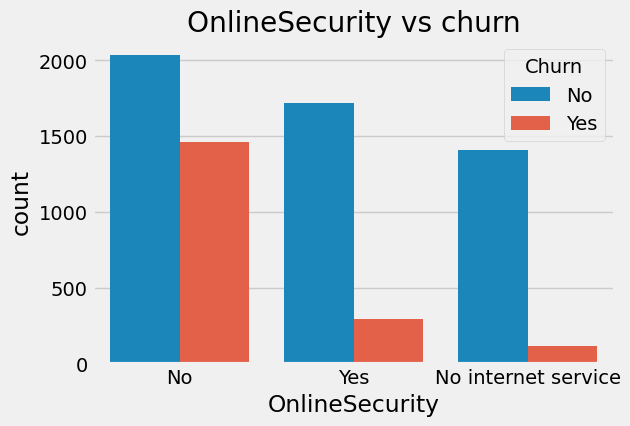

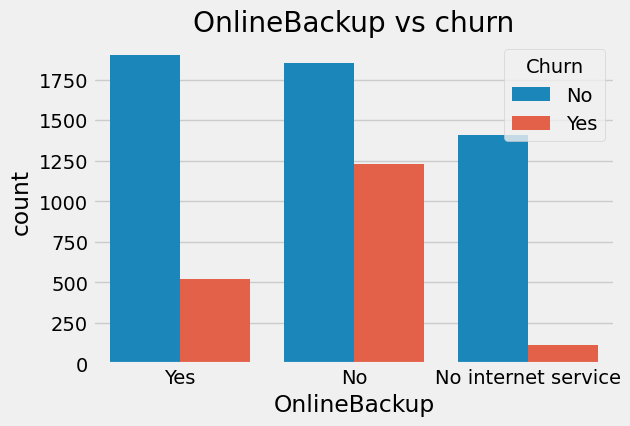

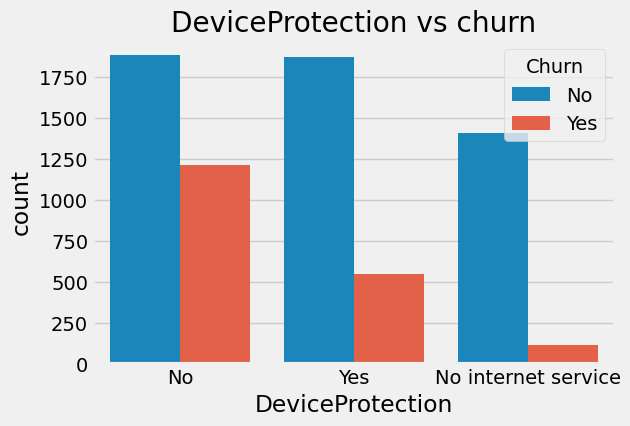

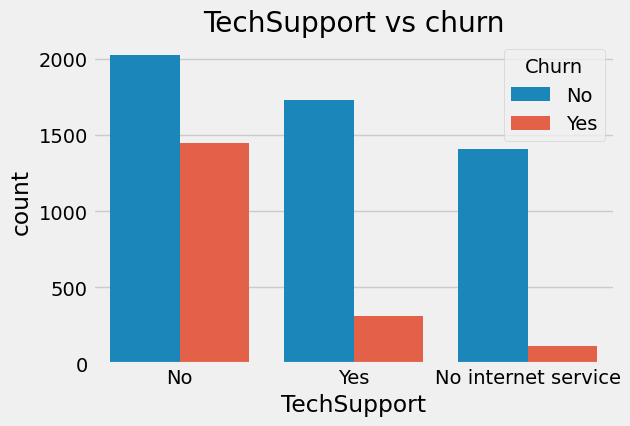

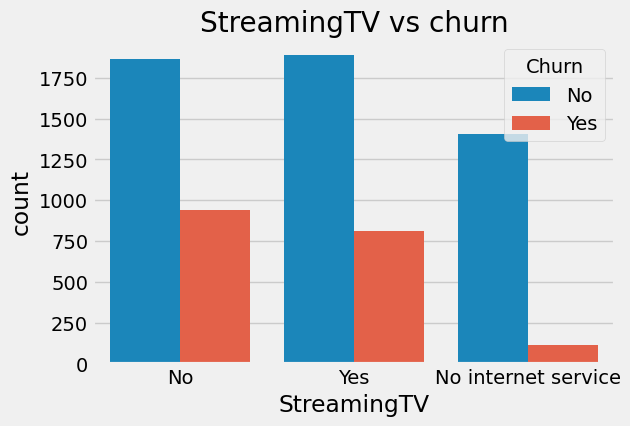

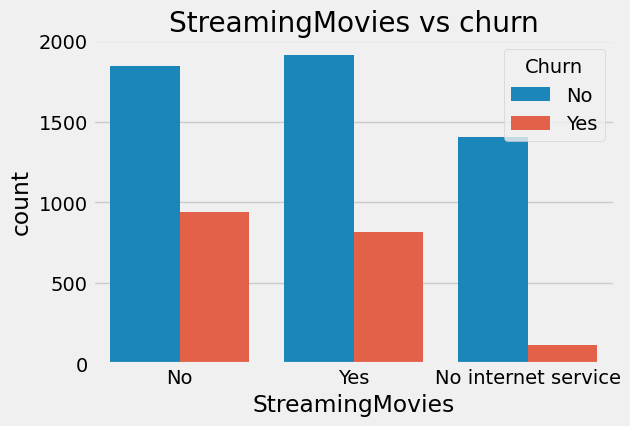

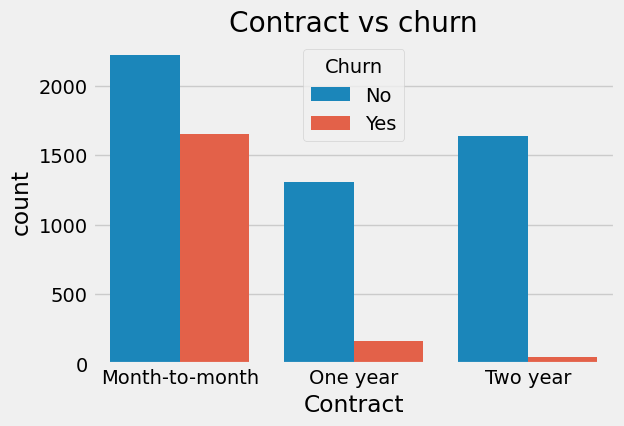

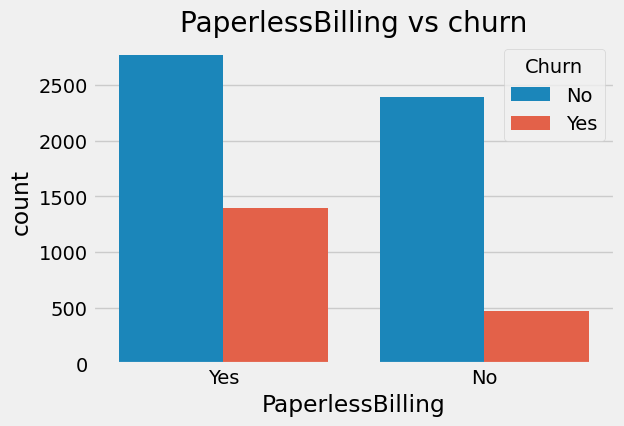

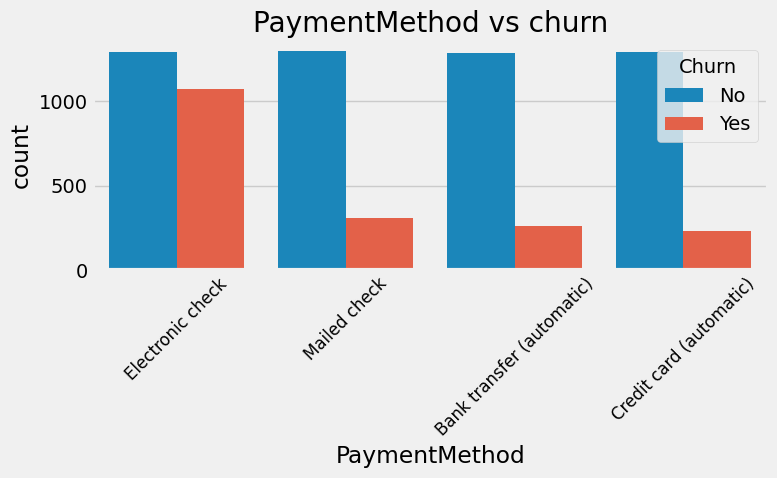

In [26]:
# Looping through all the features by y variable
features =['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
for f in features:
    unique_values = raw_data[f].nunique()

    if unique_values <= 3:
        plt.figure(figsize=(6,4))
        sns.countplot(x= f, data = raw_data, hue = 'Churn')
        plt.title(f'{f} vs churn')
        plt.show()
    else:
        plt.figure(figsize=(8,5))
        ax=sns.countplot(x= f, data = raw_data, hue = 'Churn')
        plt.xticks(rotation=45, fontsize=12)
        plt.title(f'{f} vs churn')
        plt.tight_layout()
        plt.show()


In [27]:
# Making categorical variables into numeric representation
new_raw_data = raw_data
new_raw_data = pd.get_dummies(raw_data, columns=features, dtype=int)

# # Notes:
# # We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

# # print the shape
print(raw_data.shape)
print(new_raw_data.shape)

# # Creating a new 0-1 y variable
# #new_raw_data['Loan Approved2'] = 0
new_raw_data['Churn'] = new_raw_data['Churn'].map({'Yes': 1, 'No': 0})
print(new_raw_data.shape)
# # Visualizing the data
new_raw_data

(7032, 21)
(7032, 48)
(7032, 48)


,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,84.80,1990.50,0,0,1,1,0,0,...,1,0,1,0,0,1,0,0,0,1
7039,2234-XADUH,72,103.20,7362.90,0,1,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
7040,4801-JZAZL,11,29.60,346.45,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
7041,8361-LTMKD,4,74.40,306.60,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1


## Feature Selection

In [28]:
# Split the data into X & y
X = new_raw_data.drop(['Churn', 'customerID'], axis=1).values
y = new_raw_data['Churn']

print(X.shape)
print(y.shape)

(7032, 46)
(7032,)


In [29]:
# Run a Tree-based estimators (i.e. decision trees & random forests)
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth=10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

##  Splitting the Raw Data - Hold-out validation

In [30]:
print(new_raw_data['Churn'].value_counts())

Churn
0    5163
1    1869
Name: count, dtype: int64


In [31]:
# Running Feature Importance
fi_col=[]
fi=[]

for i, column in enumerate(new_raw_data.drop(['Churn', 'customerID'], axis=1)):
    print(f'The feature importance for {column} is {dt.feature_importances_[i]:.4f}')
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])


The feature importance for tenure is 0.1362
The feature importance for MonthlyCharges is 0.1281
The feature importance for TotalCharges is 0.1239
The feature importance for gender_Female is 0.0031
The feature importance for gender_Male is 0.0040
The feature importance for SeniorCitizen_0 is 0.0121
The feature importance for SeniorCitizen_1 is 0.0054
The feature importance for Partner_No is 0.0043
The feature importance for Partner_Yes is 0.0072
The feature importance for Dependents_No is 0.0041
The feature importance for Dependents_Yes is 0.0089
The feature importance for PhoneService_No is 0.0011
The feature importance for PhoneService_Yes is 0.0075
The feature importance for MultipleLines_No is 0.0051
The feature importance for MultipleLines_No phone service is 0.0000
The feature importance for MultipleLines_Yes is 0.0078
The feature importance for InternetService_DSL is 0.0000
The feature importance for InternetService_Fiber optic is 0.0905
The feature importance for InternetService

In [35]:
# Creating a Dataframe
feature_im = zip(fi_col, fi)
feature_im = pd.DataFrame(feature_im, columns=['Feature', 'Feature importance'])

# Ordering the data
feature_im.sort_values('Feature importance', ascending=False).reset_index()

# Creating columns to keep

model_f = feature_im['Feature'][0:35]
model_f

0                                   tenure
1                           MonthlyCharges
2                             TotalCharges
3                            gender_Female
4                              gender_Male
5                          SeniorCitizen_0
6                          SeniorCitizen_1
7                               Partner_No
8                              Partner_Yes
9                            Dependents_No
10                          Dependents_Yes
11                         PhoneService_No
12                        PhoneService_Yes
13                        MultipleLines_No
14          MultipleLines_No phone service
15                       MultipleLines_Yes
16                     InternetService_DSL
17             InternetService_Fiber optic
18                      InternetService_No
19                       OnlineSecurity_No
20      OnlineSecurity_No internet service
21                      OnlineSecurity_Yes
22                         OnlineBackup_No
23        O

In [36]:
print(new_raw_data.shape)
print(new_raw_data[model_f].shape)

(7032, 48)
(7032, 35)


In [37]:
new_raw_data.isnull().sum()
first = new_raw_data.dropna()
first.isnull().sum()

customerID                                 0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
SeniorCitizen_0                            0
SeniorCitizen_1                            0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecu

In [38]:
# Split the data into X & y
X = first[model_f].values
y = first['Churn']
y = y.astype(int)
print(X.shape)
print(y.shape)

(7032, 35)
(7032,)


In [39]:
# Hold-out validation

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size= 0.7, test_size=0.3, random_state=20)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,train_size= 0.8, test_size=0.2, random_state=20)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)


print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(3937, 35)
(2110, 35)
(985, 35)
(3937,)
(2110,)
(985,)


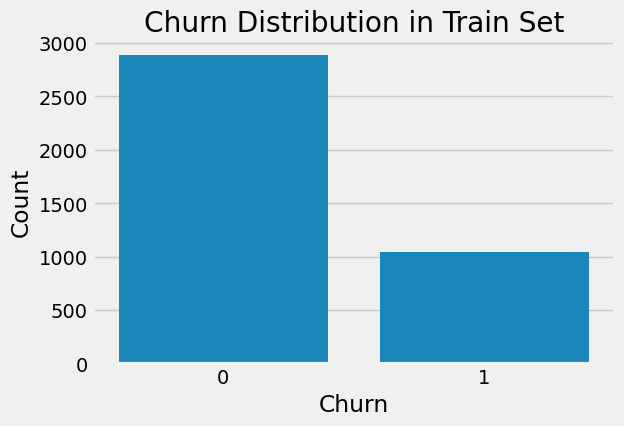

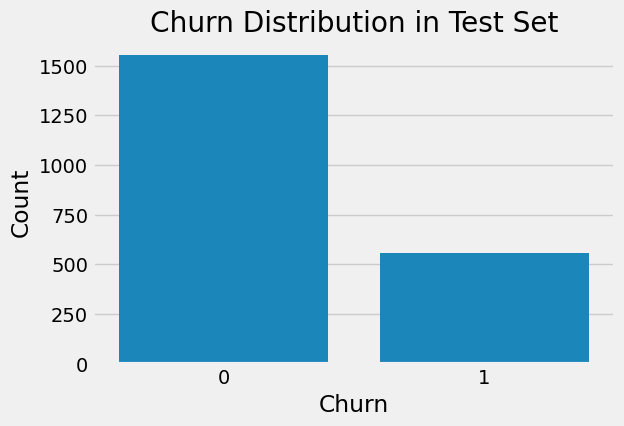

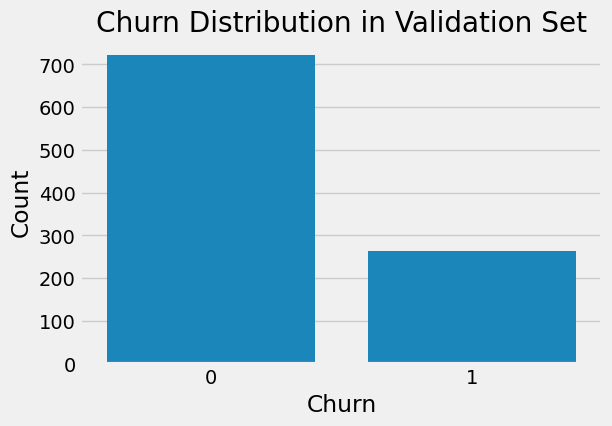

In [40]:
y_trains = [("Train", y_train), ("Test", y_test), ("Validation", y_valid)]

# Investigating the distribution of all y sets
for name, y in y_trains:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=y)
    plt.title(f'Churn Distribution in {name} Set')
    plt.xlabel('Churn')
    plt.ylabel('Count')
    plt.savefig(f'churn_distribution_{name.lower()}.png', dpi=300, bbox_inches='tight')
    plt.show()

### RUNNING LOGISTIC REGRESSION

In [41]:
# Training my model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

m1 = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

m1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [43]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
m1.predict(X_train)
y_predict = m1.predict(X_train)

# predict_proba - Probability estimates
pred_proba = m1.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
m1.named_steps['logisticregression'].coef_.shape

# score- Returns the mean accuracy on the given test data and labels - below

(1, 35)

### EVALUATION

In [44]:
# Accuracy on Train
print(f"The Training Accuracy is {m1.score(X_train, y_train):.4f}")

# Accuracy on Test
print(f"The Testing Accuracy is {m1.score(X_test, y_test):.4f}")

print('...........................................................')
line_width = 60
# Classification Report
print("\n" + "CLASSIFICATION REPORT".center(line_width, "="))
print(classification_report(y_train, y_predict))

The Training Accuracy is 0.7991
The Testing Accuracy is 0.7962
...........................................................

===================CLASSIFICATION REPORT====================
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      2888
           1       0.66      0.51      0.57      1049

    accuracy                           0.80      3937
   macro avg       0.75      0.71      0.72      3937
weighted avg       0.79      0.80      0.79      3937



- This model which had imbalanced data has a high overall accuracy (≈80%), but it does a poor job identifying churners (Recall = 0.51).And does not predict churners well with precision of 66%

### USING THE DOWNSAMPLED DATA TO PROCEED WITH FEATURE IMPORTANCE

In [45]:
# filtering new raw_data DataFrame:
minority_class = new_raw_data[new_raw_data['Churn'] == 1]
majority_class = new_raw_data[new_raw_data['Churn'] == 0]

print(f"Minority class size: {len(minority_class)}")
print(f"Majority class size: {len(majority_class)}")


Minority class size: 1869
Majority class size: 5163


In [55]:
#Resample y distribution due to disparities in the proportions of the classes of the y
#IT TAKES CARE OF THE NULL COLUMNS 
from sklearn.utils import resample

majority_downsampled = resample(
    majority_class,
    replace=False,  # do not duplicate
    n_samples=len(minority_class),  # match minority class size
    random_state=42
)

# Combine
balanced_data = pd.concat([minority_class, majority_downsampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# Confirm balance
print(balanced_data['Churn'].value_counts())

Churn
1    1869
0    1869
Name: count, dtype: int64


In [56]:
# Running Feature Importance
fi_col=[]
fi=[]

for i, column in enumerate(balanced_data.drop(['Churn', 'customerID'], axis=1)):
    print(f'The feature importance for {column} is {dt.feature_importances_[i]:.4f}')
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])


The feature importance for tenure is 0.1362
The feature importance for MonthlyCharges is 0.1281
The feature importance for TotalCharges is 0.1239
The feature importance for gender_Female is 0.0031
The feature importance for gender_Male is 0.0040
The feature importance for SeniorCitizen_0 is 0.0121
The feature importance for SeniorCitizen_1 is 0.0054
The feature importance for Partner_No is 0.0043
The feature importance for Partner_Yes is 0.0072
The feature importance for Dependents_No is 0.0041
The feature importance for Dependents_Yes is 0.0089
The feature importance for PhoneService_No is 0.0011
The feature importance for PhoneService_Yes is 0.0075
The feature importance for MultipleLines_No is 0.0051
The feature importance for MultipleLines_No phone service is 0.0000
The feature importance for MultipleLines_Yes is 0.0078
The feature importance for InternetService_DSL is 0.0000
The feature importance for InternetService_Fiber optic is 0.0905
The feature importance for InternetService

In [86]:
# Creating a Dataframe
feature_imp = zip(fi_col, fi)
feature_imp = pd.DataFrame(feature_imp, columns=['Feature', 'Feature importance'])

# Ordering the data
feature_imp.sort_values('Feature importance', ascending=False).reset_index()

# Creating columns to keep

# model_features = feature_imp['Feature'][0:35]
# model_features

,index,Feature,Feature importance
0,37,Contract_Month-to-month,0.306090
1,0,tenure,0.136185
2,1,MonthlyCharges,0.128116
3,2,TotalCharges,0.123876
4,17,InternetService_Fiber optic,0.090534
5,44,PaymentMethod_Electronic check,0.019527
6,28,TechSupport_No,0.018862
7,38,Contract_One year,0.015550
8,21,OnlineSecurity_Yes,0.013922
9,5,SeniorCitizen_0,0.012095


In [58]:
print(new_raw_data.shape)
print(new_raw_data[model_features].shape)

(7032, 48)
(7032, 35)


In [59]:
balanced_data.isnull().sum()
final = balanced_data.dropna()
final.isnull().sum()

customerID                                 0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
SeniorCitizen_0                            0
SeniorCitizen_1                            0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecu

In [60]:
# Split the data into X & y
X = final[model_features].values
y = final['Churn']
y = y.astype(int)
print(X.shape)
print(y.shape)

(3738, 35)
(3738,)


In [61]:
# Hold-out validation

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size= 0.7, test_size=0.3, random_state=20)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,train_size= 0.8, test_size=0.2, random_state=20)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)


print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)



(2092, 35)
(1122, 35)
(524, 35)
(2092,)
(1122,)
(524,)


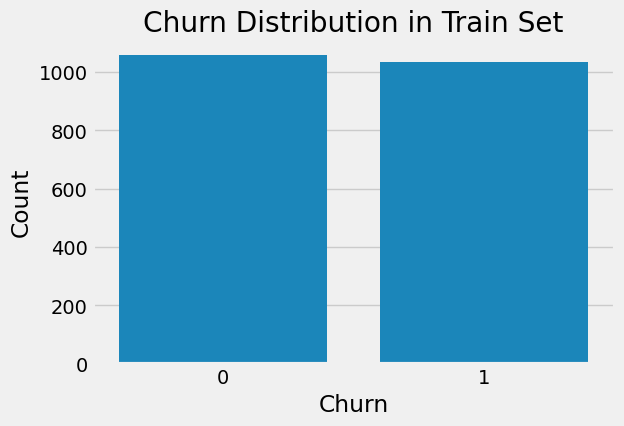

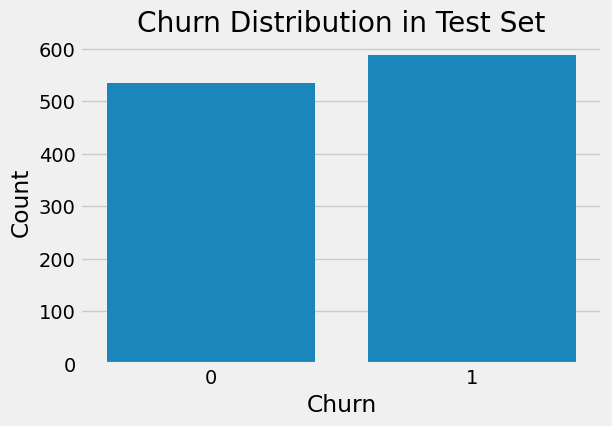

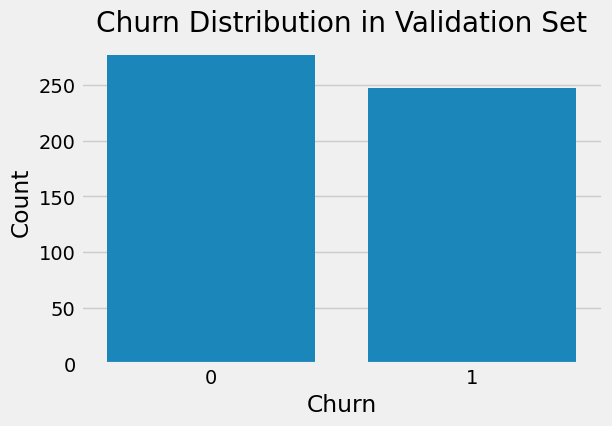

In [63]:
y_trains = [("Train", y_train), ("Test", y_test), ("Validation", y_valid)]

# Investigating the distribution of all y sets
for name, y in y_trains:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=y)
    plt.title(f'Churn Distribution in {name} Set')
    plt.xlabel('Churn')
    plt.ylabel('Count')
    plt.savefig(f'churn_distribution_{name.lower()}.png', dpi=300, bbox_inches='tight')
    plt.show()

- The churn distribution across the train, test, and validation sets is well balanced, indicating successful resampling.
- This balance ensures fair model training and evaluation without bias toward the majority class.
- As a result, the logistic regression model is better positioned to detect both churned and non-churned customers accurately.

## Running Logistic Regression

In [64]:
# Training my model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [65]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
model.predict(X_train)
y_predict = model.predict(X_train)

# predict_proba - Probability estimates
pred_proba = model.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
model.named_steps['logisticregression'].coef_.shape

# score- Returns the mean accuracy on the given test data and labels - below

(1, 35)

## Evaluating the Model

In [66]:
# Accuracy on Train
print(f"The Training Accuracy is {model.score(X_train, y_train):.4f}")

# Accuracy on Test
print(f"The Testing Accuracy is {model.score(X_test, y_test):.4f}")

print('...........................................................')
line_width = 60
# Classification Report
print("\n" + "CLASSIFICATION REPORT".center(line_width, "="))
print(classification_report(y_train, y_predict))

The Training Accuracy is 0.7486
The Testing Accuracy is 0.7496
...........................................................

===================CLASSIFICATION REPORT====================
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1058
           1       0.74      0.75      0.75      1034

    accuracy                           0.75      2092
   macro avg       0.75      0.75      0.75      2092
weighted avg       0.75      0.75      0.75      2092



- Model is better at detecting churners, with significantly higher Recall (0.75) and F1-score (0.75) for churn class — which is usually the business goal in churn prediction.

In [67]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [68]:
# Plotting Confusion Matrix
# To compare the training set with predictions

cm = confusion_matrix(y_train, y_predict)
cm_norm = cm/cm.sum(axis=1).reshape(-1,1)

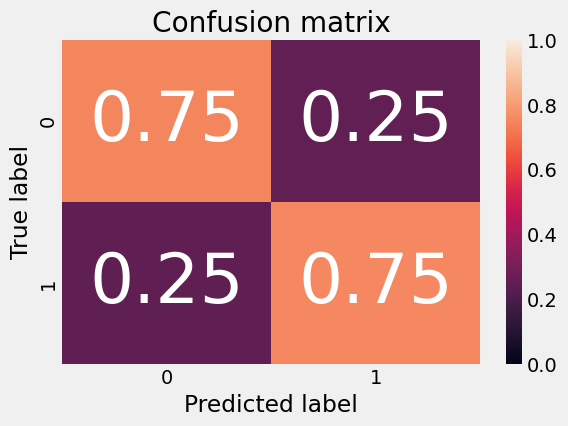

In [69]:
# Visualizing cm
cm_norm
plt.figure(figsize=(6,4))
plot_confusion_matrix(cm_norm, classes=model.named_steps['logisticregression'].classes_,title='Confusion matrix')

### INSIGHTS FROM CONFUSION MATRIX
- 75% of customers who were predicted not to churn actually did not churn, indicating the model is reliable in identifying loyal customers.

- 25% of customers were incorrectly predicted as churners, even though they stayed. This represents false positives, which may lead to unnecessary retention efforts.

- 75% of actual churners were correctly identified by the model. This is important because it shows the model captures most of the customers at risk.

- 25% of churners were missed, meaning the model predicted they would stay but they actually left — this represents false negatives, which could result in lost customers.


In [70]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0)-np.diag(cm)
FN = cm.sum(axis=1)-np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP + FN)
print("The True Positive Rate is:",TPR)
# Precision or positive predictive value
PPV = TP/(TP + FP)
print("The Positive Predictive Rate is:", PPV)
# False positive rate or False alarm rate
FPR = FP/(FP + TN)
print("The False Positive Rate is:",FPR)
# False negative rate or Miss Rate
FNR = FN/(FN + TP)
print("The False Negative Rate is:",FNR)


##Total averages :
print(" ")
print("The average TPR is:", round(TPR.sum()/2,4))
print("The average PPV is:", round(PPV.sum()/2,4))
print("The average FPR is:", round(FPR.sum()/2,4))
print("The average FNR is:", round(FNR.sum()/2,4))


The True Positive Rate is: [0.746692 0.750484]
The Positive Predictive Rate is: [0.753817 0.743295]
The False Positive Rate is: [0.249516 0.253308]
The False Negative Rate is: [0.253308 0.249516]
 
The average TPR is: 0.7486
The average PPV is: 0.7486
The average FPR is: 0.2514
The average FNR is: 0.2514


### Logarithmic Loss

In [71]:
# Running Log loss on training
print("The Log Loss on Training is:", log_loss(y_train, pred_proba))

# Running Log loss on testing
pred_proba_t = model.predict_proba(X_test)
print("The Log Loss on Testing is:", log_loss(y_test, pred_proba_t))

The Log Loss on Training is: 0.5003268391853121
The Log Loss on Testing is: 0.5012865146363984


- The Log loss on Testing data is slightly above 0.5, which signifies a slightly significant model inefficiency hence further optimisation is need

## Hyper Parameter Tuning

In [72]:
# We will loop over parameter C (Inverse of regularization strength).
#Inverse of regularization strength helps to avoid overfitting - it penalizes large values of your parameters
#It also helps to find Global Minimum by moving to better "solutions" from local minimum to global minimum
# The values of C to search should be n-equally-spaced values in log space ranging from 1e-5 to 1e5

np.geomspace(1e-5, 1e5, num=20)

array([0.000010, 0.000034, 0.000113, 0.000379, 0.001274, 0.004281,
       0.014384, 0.048329, 0.162378, 0.545559, 1.832981, 6.158482,
       20.691381, 69.519280, 233.572147, 784.759970, 2636.650899,
       8858.667904, 29763.514416, 100000.000000])

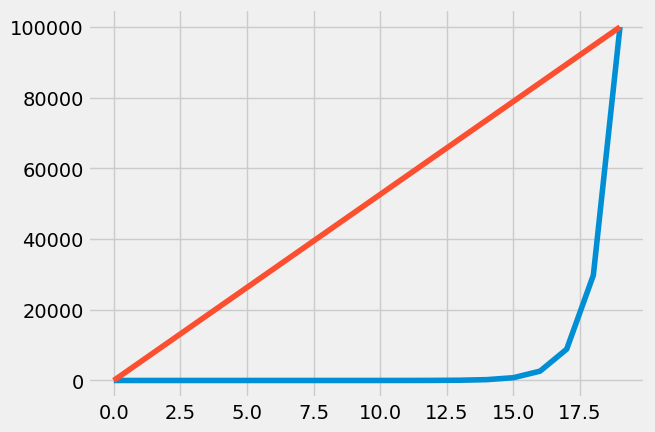

In [73]:
# Creating a range for C values
np.geomspace(1e-5, 1e5, num=20)

# ploting it
plt.plot(np.geomspace(1e-5, 1e5, num=20)) #  uniformly distributed in log space
plt.plot(np.linspace(1e-5, 1e5, num=20)) # uniformly distributed in linear space, instead of log space
# plt.plot(np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)) # same as geomspace

In [74]:
# Looping over the parameters
C_list = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_list:
    model2 = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, C=c))
    model2.fit(X_train, y_train)
    score = model2.score(X_test,y_test)
    CA.append(score)
    print(f"The CA of C parameter {c} is {score}")
    pred_proba_t = model2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print(f"The Log loss of C parameter {c} is {log_loss2}")
    print(".....")

The CA of C parameter 1e-05 is 0.6853832442067737
The Log loss of C parameter 1e-05 is 0.6854927477417809
.....
The CA of C parameter 3.359818286283781e-05 is 0.7352941176470589
The Log loss of C parameter 3.359818286283781e-05 is 0.6688070259687612
.....
The CA of C parameter 0.00011288378916846884 is 0.732620320855615
The Log loss of C parameter 0.00011288378916846884 is 0.6311188556012656
.....
The CA of C parameter 0.000379269019073225 is 0.7370766488413547
The Log loss of C parameter 0.000379269019073225 is 0.5784926493614059
.....
The CA of C parameter 0.0012742749857031334 is 0.7379679144385026
The Log loss of C parameter 0.0012742749857031334 is 0.5369401648163195
.....
The CA of C parameter 0.004281332398719391 is 0.7406417112299465
The Log loss of C parameter 0.004281332398719391 is 0.515174438201758
.....
The CA of C parameter 0.01438449888287663 is 0.7459893048128342
The Log loss of C parameter 0.01438449888287663 is 0.506697761776015
.....
The CA of C parameter 0.048329302

In [75]:
# putting the outcomes in a Table

# reshaping
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)
# zip
outcomes = zip(C_list,CA2,Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ['C_list','CA2','Logarithmic_Loss2'])

#print

df_outcomes

# Ordering the data
df_outcomes.sort_values('Logarithmic_Loss2', ascending = True).reset_index()

,index,C_list,CA2,Logarithmic_Loss2
0,19,100000.000000,0.749554,0.501160
1,18,29763.514416,0.749554,0.501160
2,17,8858.667904,0.749554,0.501160
3,16,2636.650899,0.749554,0.501160
4,15,784.759970,0.749554,0.501160
5,14,233.572147,0.749554,0.501161
6,13,69.519280,0.749554,0.501162
7,12,20.691381,0.749554,0.501166
8,11,6.158482,0.749554,0.501181
9,10,1.832981,0.750446,0.501231


- From the loop of the above C parameter, the parameter with the least log loss is 100000.000000

In [76]:
# Scikit-learn offers a LogisticRegressionCV module which implements Logistic Regression 
# with builtin cross-validation to find out the optimal C parameter

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=0, shuffle=True)


# Logistic Reg CV
model3 = make_pipeline(
    StandardScaler(),
    LogisticRegressionCV(max_iter=1000,cv=kf,random_state=15, Cs= C_list)
)

model3.fit(X_train, y_train)
print("The CA is:", model3.score(X_test, y_test))
print("....")
pred_proba_t = model3.predict_proba(X_test)
log_loss3 = log_loss(y_test, pred_proba_t)
print("The Log Loss is:", log_loss3)
print("....")
print("The Optimal C parameter is:",model3.named_steps['logisticregressioncv'].C_)

# Doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html

The CA is: 0.7459893048128342
....
The Log Loss is: 0.5036409490502579
....
The Optimal C parameter is: [0.048329]


- The above output results of a c parameter tuning module in scikit learn which gives a relatively higher Log loss for the c parameter than the earlier custom loop

- Hence we go with the custom version

The CA of C parameter 1e-05 is 0.6853832442067737
The Log loss of C parameter 1e-05 is 0.6854927477417809
.....


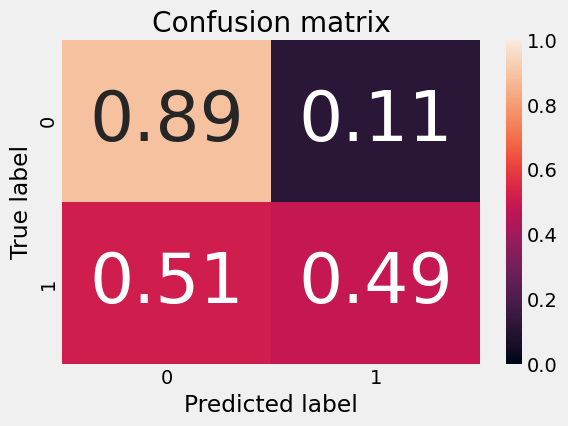

The CA of C parameter 3.359818286283781e-05 is 0.7352941176470589
The Log loss of C parameter 3.359818286283781e-05 is 0.6688070259687612
.....


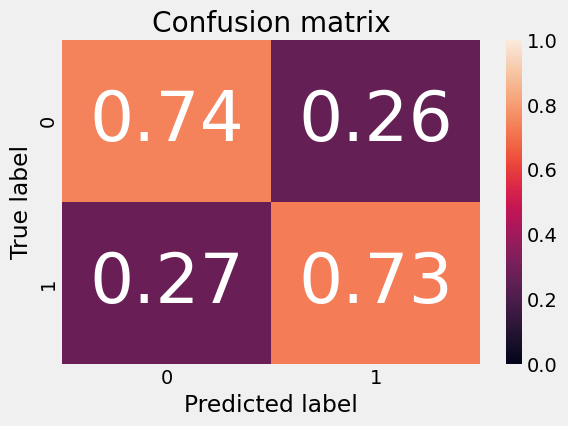

The CA of C parameter 0.00011288378916846884 is 0.732620320855615
The Log loss of C parameter 0.00011288378916846884 is 0.6311188556012656
.....


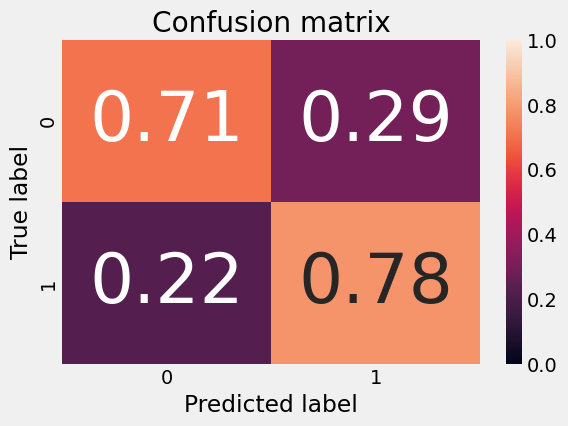

The CA of C parameter 0.000379269019073225 is 0.7370766488413547
The Log loss of C parameter 0.000379269019073225 is 0.5784926493614059
.....


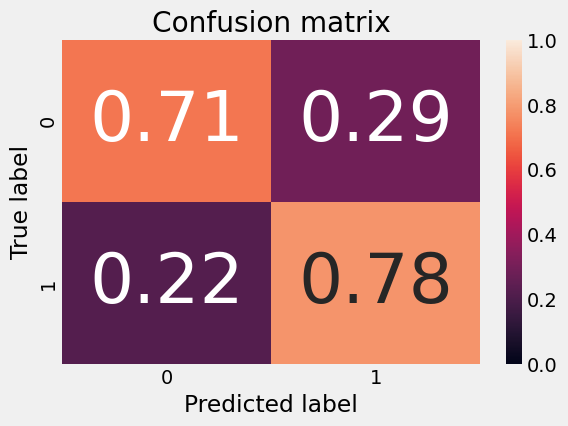

The CA of C parameter 0.0012742749857031334 is 0.7379679144385026
The Log loss of C parameter 0.0012742749857031334 is 0.5369401648163195
.....


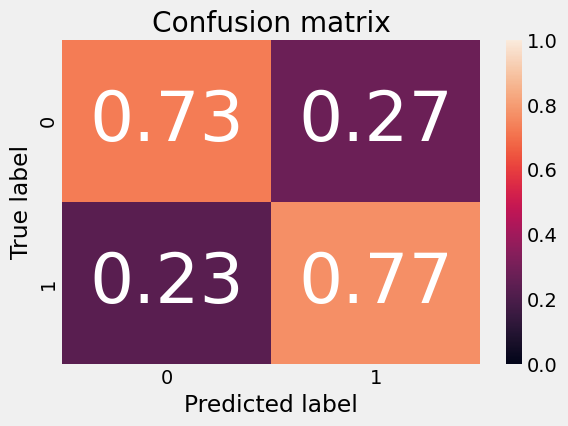

The CA of C parameter 0.004281332398719391 is 0.7406417112299465
The Log loss of C parameter 0.004281332398719391 is 0.515174438201758
.....


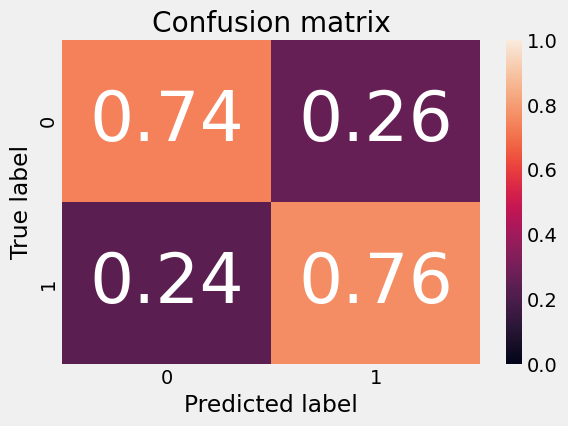

The CA of C parameter 0.01438449888287663 is 0.7459893048128342
The Log loss of C parameter 0.01438449888287663 is 0.506697761776015
.....


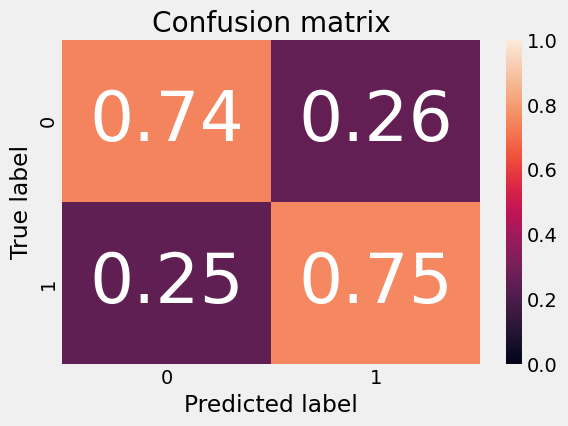

The CA of C parameter 0.04832930238571752 is 0.7459893048128342
The Log loss of C parameter 0.04832930238571752 is 0.5036460933462545
.....


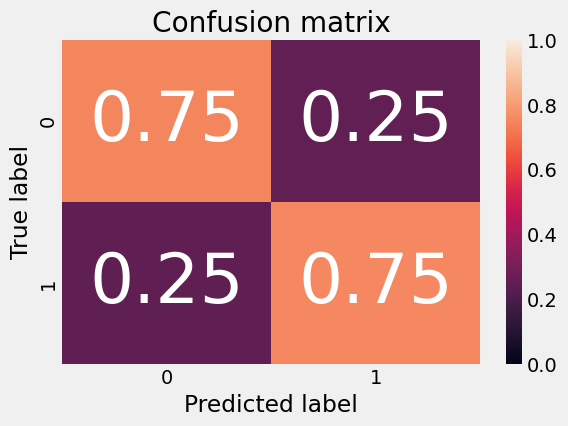

The CA of C parameter 0.1623776739188721 is 0.7486631016042781
The Log loss of C parameter 0.1623776739188721 is 0.5020637814592824
.....


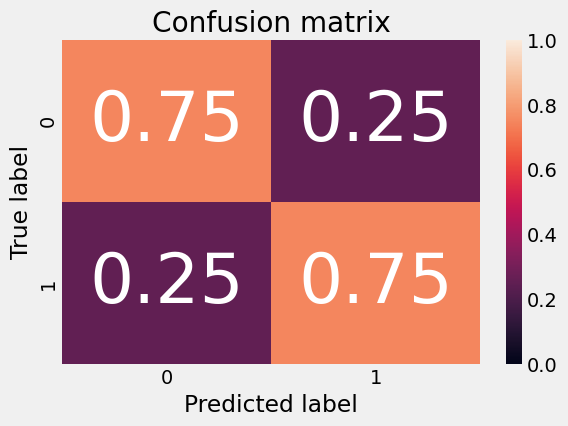

The CA of C parameter 0.5455594781168515 is 0.749554367201426
The Log loss of C parameter 0.5455594781168515 is 0.5014115595982317
.....


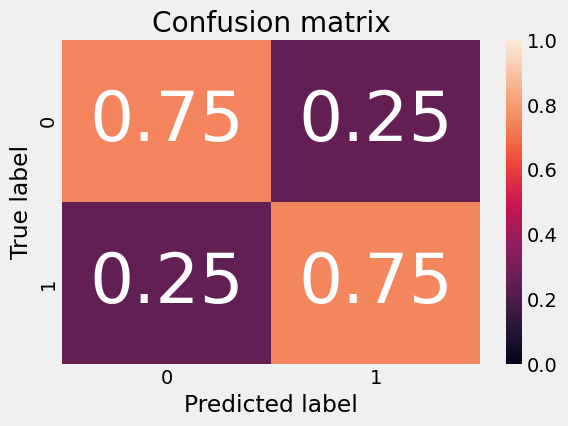

The CA of C parameter 1.8329807108324339 is 0.750445632798574
The Log loss of C parameter 1.8329807108324339 is 0.5012314028110274
.....


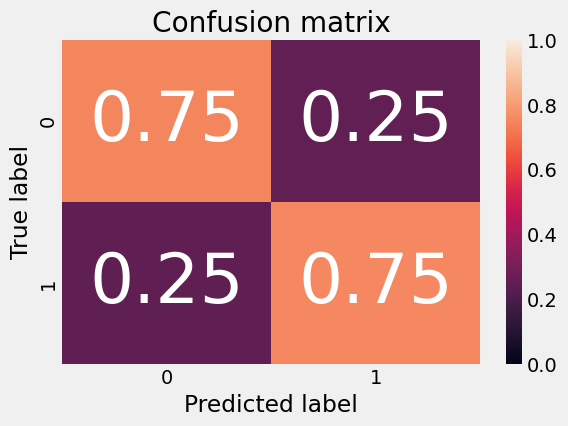

The CA of C parameter 6.1584821106602545 is 0.749554367201426
The Log loss of C parameter 6.1584821106602545 is 0.5011805593879
.....


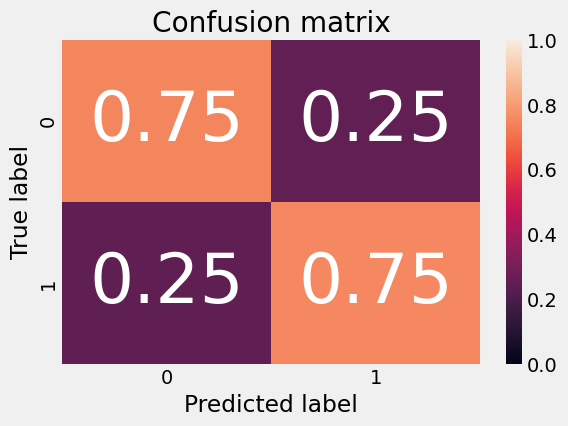

The CA of C parameter 20.6913808111479 is 0.749554367201426
The Log loss of C parameter 20.6913808111479 is 0.5011660702353207
.....


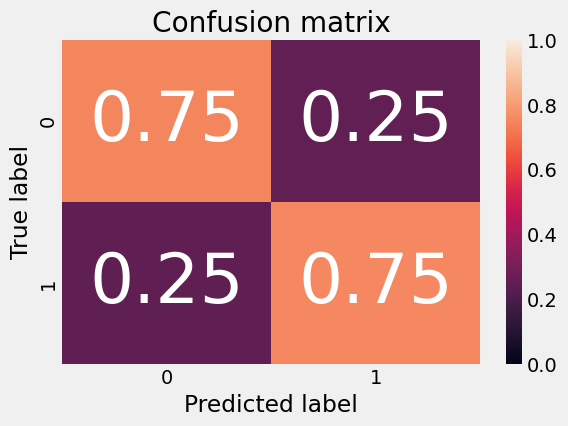

The CA of C parameter 69.51927961775606 is 0.749554367201426
The Log loss of C parameter 69.51927961775606 is 0.5011618228012552
.....


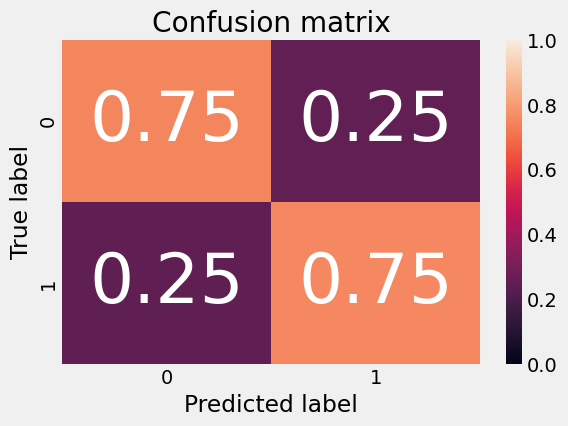

The CA of C parameter 233.57214690901213 is 0.749554367201426
The Log loss of C parameter 233.57214690901213 is 0.5011605646080439
.....


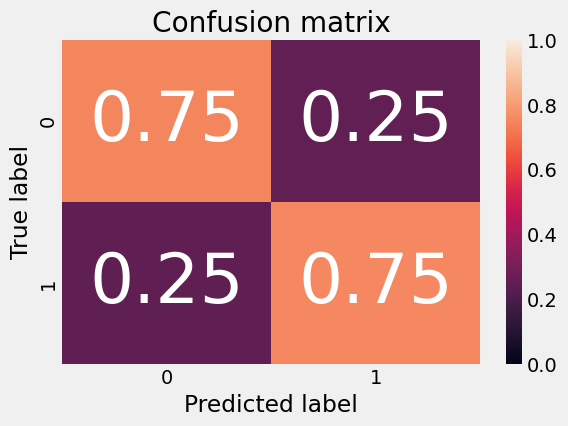

The CA of C parameter 784.7599703514607 is 0.749554367201426
The Log loss of C parameter 784.7599703514607 is 0.5011601906625932
.....


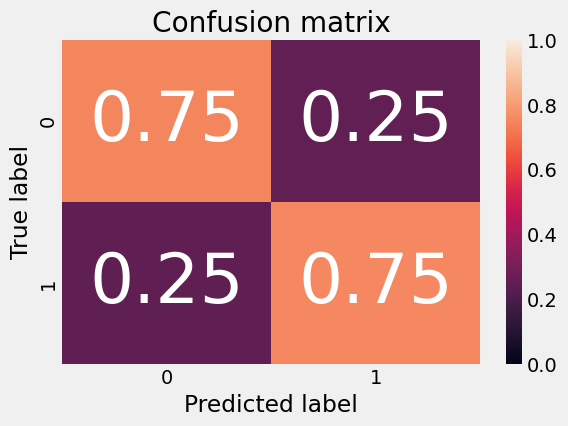

The CA of C parameter 2636.6508987303555 is 0.749554367201426
The Log loss of C parameter 2636.6508987303555 is 0.501160079411027
.....


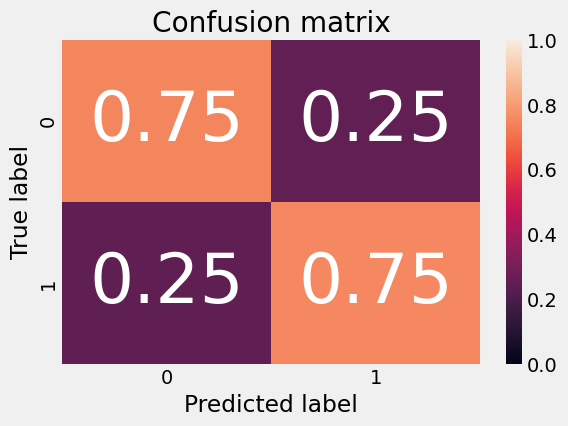

The CA of C parameter 8858.667904100832 is 0.749554367201426
The Log loss of C parameter 8858.667904100832 is 0.5011600463028839
.....


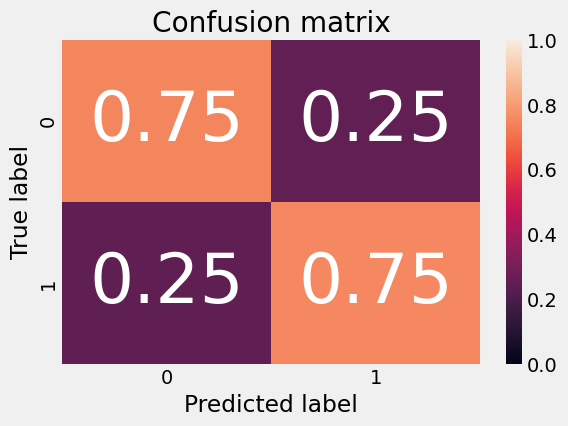

The CA of C parameter 29763.51441631313 is 0.749554367201426
The Log loss of C parameter 29763.51441631313 is 0.5011600364491086
.....


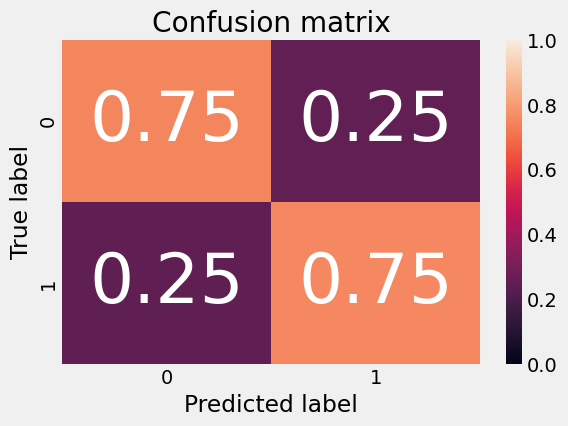

The CA of C parameter 100000.0 is 0.749554367201426
The Log loss of C parameter 100000.0 is 0.5011600335163139
.....


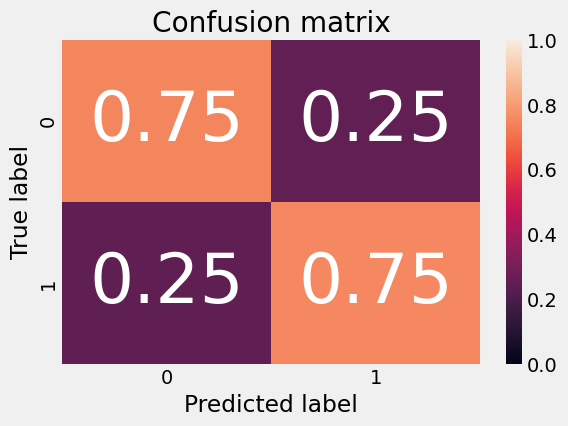

In [77]:
# Maybe we have a different metric we want to track

# Looping over the parameters
C_list = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_list:
    model2 = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, C=c))
    model2.fit(X_train, y_train)
    score = model2.score(X_test,y_test)
    CA.append(score)
    print(f"The CA of C parameter {c} is {score}")
    pred_proba_t = model2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print(f"The Log loss of C parameter {c} is {log_loss2}")
    print(".....")

    y_predict = model2.predict(X_train)
    cm = confusion_matrix(y_train, y_predict)
    cm_norm = cm/cm.sum(axis=1).reshape(-1,1)
    
    plt.figure(figsize=(6,4))
    plot_confusion_matrix(cm_norm, classes=model.named_steps['logisticregression'].classes_,title='Confusion matrix') 
    plt.show()

### Performance of the model against a Dummy classifier

In [78]:
# Training a Dummy Classifier

from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

score = dummy_clf.score(X_test,y_test)
pred_proba_t = dummy_clf.predict_proba(X_test)
log_loss4 = log_loss(y_test, pred_proba_t)

print("Testing Accuracy:", score)
print("Testing Log Loss:", log_loss4)

Testing Accuracy: 0.47593582887700536
Testing Log Loss: 18.889187337612196


- From the classification accuracy and log loss of the dummy classifier, it is clearly shown that our model outperforms the dummy classifier and also good enough to make predictions on unseen data

## Final Model with Selected Parameters

In [80]:
# Final Model 
model_final = make_pipeline(
StandardScaler(),
LogisticRegression(max_iter=1000,solver='lbfgs', C=100000.000000))
model_final.fit(X_train, y_train)
score = model_final.score(X_valid,y_valid)

pred_proba_t = model_final.predict_proba(X_valid)
log_loss_final = log_loss(y_valid, pred_proba_t)

print("Testing Accuracy:", score)
print("Log Loss:", log_loss_final)

Testing Accuracy: 0.7557251908396947
Log Loss: 0.4937467470496042


#  Final Logistic Regression Model Report

##  Model Overview
The final model selected was a **logistic regression classifier**, trained to predict customer churn based on selected features after preprocessing and resampling. The model was evaluated on the test set using key classification metrics.

---

##  Performance Metrics
- **Testing Accuracy**: `75.6%`  
  The model correctly predicted the churn status for approximately **75.6%% of customers** in the test set. This indicates a reasonably good balance between precision and recall, especially for a baseline model.

- **Log Loss**: `0.494`  
  Log Loss measures the uncertainty of the model's predictions. A log loss of **0.494** suggests that the model produces fairly confident and calibrated probabilities, rather than being random or highly uncertain.

---

##  Interpretation
- The accuracy of 75.6% means the model has learned meaningful patterns, though there is still room for improvement due to the unbalanced nature of the dataset
- The log loss value complements the accuracy by showing that the model's **probabilistic predictions** are reasonably well-calibrated — important in churn prediction where not just the class but the **confidence** matters.
- Given that churn datasets are often **imbalanced**, log loss is a more reliable metric than accuracy alone.

---

#### Saving the model

In [81]:
import joblib

In [82]:
# Save it
joblib.dump(model_final, 'churn_model.pkl')

['churn_model.pkl']

### Adding two new columns to our data frame 'Churn_Predicted' and 'Churn_Probability'

In [83]:
final['Churn_Predicted'] = model_final.predict(X)
final['Churn_Probability'] = model.predict_proba(X)[:, 1]

In [213]:
final

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Predicted,Churn_Probability
0,9039-RBEEE,39,48.95,1880.85,1,0,1,1,0,1,...,0,0,0,1,0,1,0,0,0,0.194412
1,6481-OGDOO,67,90.60,6056.15,1,0,1,1,0,0,...,1,0,0,1,0,1,0,0,0,0.181052
2,1934-SJVJK,1,20.15,20.15,1,0,1,1,0,1,...,0,0,1,0,0,0,0,1,0,0.369622
3,5108-ADXWO,11,73.50,791.75,1,0,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0.663715
4,2530-ENDWQ,71,93.70,6585.35,1,1,0,1,0,0,...,0,1,0,1,1,0,0,0,0,0.453634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,6899-PPEEA,37,96.55,3580.30,1,1,0,0,1,1,...,0,0,0,1,0,0,1,0,1,0.827416
3734,3669-LVWZB,5,51.00,305.95,1,0,1,1,0,1,...,0,0,0,1,0,0,0,1,1,0.845861
3735,7774-OJSXI,31,103.45,3066.45,1,0,1,1,0,1,...,1,0,0,1,0,0,1,0,1,0.758372
3736,0412-UCCNP,55,59.20,3175.85,0,0,1,1,0,1,...,0,1,0,1,0,0,1,0,0,0.050130


In [84]:
final['Revenue_At_Risk'] = final['Churn_Probability'] * final['MonthlyCharges']


In [85]:
final.to_csv('churn_predictions.csv', index=False)

### Churn Probability Distribution (Binned Histogram)
- To better understand how churn risk is distributed across the customer base, we create a binned histogram of the Churn_Probability values.

In [87]:
final['Churn_Probability_Bin'] = (final['Churn_Probability'] * 10).floordiv(1) / 10

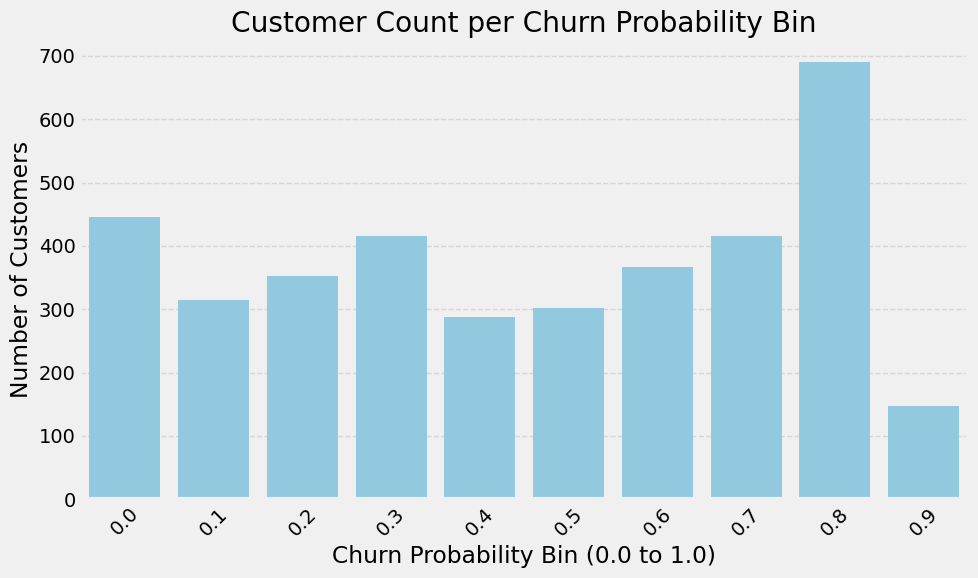

In [89]:
plt.figure(figsize=(10, 6))
sns.countplot(data=final, x='Churn_Probability_Bin', color='skyblue')

plt.title("Customer Count per Churn Probability Bin")
plt.xlabel("Churn Probability Bin (0.0 to 1.0)")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 🔽 Save the figure before displaying it
plt.savefig("churn_probability_distribution.png", dpi=300)

plt.show()

- The churn probability distribution shows two major customer groups: one at very low risk (0.0–0.1) and another at high risk (0.8–0.9). The largest number of customers are in the 0.8 bin, indicating many are at significant risk of churning. Moderate-risk bins (0.2–0.7) have fairly consistent counts, suggesting a wide middle group with uncertain behavior. Very few customers fall into the extreme high-risk bin (0.9–1.0), meaning the model is cautious with maximum probability. Overall, the business should focus retention strategies on the 0.8 group while monitoring the moderate-risk range.